In [3]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [4]:
# Data file
vehicles = "data/vehicles.csv"

# Read in the data
vehicles_data = pd.read_csv(vehicles)
vehicles_data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539754,7076296329,https://syracuse.craigslist.org/cto/d/mottvill...,syracuse,https://syracuse.craigslist.org,7950,2008.0,rover,NaN,excellent,8 cylinders,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_86RgcbSIhT...,Selling my 2008 Range Rover - it's an extra ve...,NaN,ny,42.9506,-76.4254
539755,7088752165,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,13995,2016.0,nissan,frontier,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00R0R_2FiHQj8mDm...,2016 Nissan Frontier SV V6 4x4 4dr King Cab 6....,NaN,nc,35.7636,-78.7443
539756,7088749883,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10995,2010.0,bmw,335i,NaN,NaN,...,NaN,compact,coupe,black,https://images.craigslist.org/00v0v_3sp1G5hNhk...,2010 BMW 3 Series 335i 2dr Coupe Offered b...,NaN,nc,35.7636,-78.7443
539757,7088747986,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,6495,2015.0,dodge,dart,NaN,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00101_6orUUSDpdh...,2015 Dodge Dart SE 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443


In [5]:
vehicles_data.nunique(axis=0)

id              539759
url             539759
region             403
region_url         413
price            18386
year               113
manufacturer        43
model            36948
condition            6
cylinders            8
fuel                 5
odometer        122400
title_status         6
transmission         3
vin             181677
drive                3
size                 4
type                13
paint_color         12
image_url       364282
description     454053
county               0
state               51
lat              54587
long             54552
dtype: int64

In [6]:
vehicles_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,539759.000000,539759.000000,538772.000000,440783.000000,0.000000,530785.000000,530785.000000
mean,7087608553.749804,195421.387573,2009.830982,100800.803259,nan,38.432128,-94.040501
std,5234175.784002,22082524.011569,9.161334,176705.802933,nan,5.916936,17.626658
min,7065764796.000000,0.000000,0.000000,0.000000,nan,-84.911400,-176.810000
25%,7084240305.500000,4400.000000,2007.000000,47038.500000,nan,34.197100,-106.782000
50%,7088972959.000000,9500.000000,2012.000000,93300.000000,nan,39.077600,-88.100900
75%,7092094043.000000,17926.000000,2015.000000,137755.000000,nan,42.449100,-81.219000
max,7093536715.000000,4294967295.000000,2021.000000,64809218.000000,nan,84.514800,161.016000


In [7]:
NA_val = vehicles_data.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/vehicles_data.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_data_cleaned = vehicles_data[na_filter(NA_val)]
vehicles_data_cleaned.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'type', 'paint_color', 'image_url', 'description', 'state', 'lat',
       'long'],
      dtype='object')

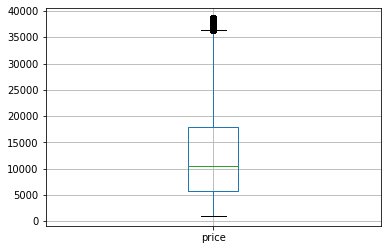

In [8]:
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'].between(999.99, 250000)] # Computing IQR
Q1 = vehicles_data_cleaned['price'].quantile(0.25)
Q3 = vehicles_data_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
vehicles_data_filtered = vehicles_data_cleaned.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
vehicles_data_filtered.boxplot('price')

In [9]:
vehicles_data_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,464354.000000,464354.000000,463765.000000,383129.000000,460523.000000,460523.000000
mean,7087623849.464673,12748.572374,2009.409179,104964.186919,38.461849,-93.644432
std,5220950.531307,8682.629866,9.126002,183079.280853,5.905147,17.435375
min,7065764796.000000,1000.000000,0.000000,0.000000,-84.911400,-176.810000
25%,7084276125.500000,5708.500000,2006.000000,52532.000000,34.263900,-105.948000
50%,7088987016.500000,10550.000000,2011.000000,98152.000000,39.123400,-87.871700
75%,7092091386.750000,17995.000000,2015.000000,141500.000000,42.449000,-81.033900
max,7093536715.000000,38629.000000,2021.000000,64809218.000000,84.514800,161.016000


In [10]:
# cant be newer than 2020
vehicles_data_filtered = vehicles_data_filtered[vehicles_data_filtered['year'].between(1900, 2020)]# = 140000 + 1.5 * (140000-52379)
vehicles_data_filtered = vehicles_data_filtered[vehicles_data_filtered['odometer'].between(0, 271431.5)]


In [11]:
vehicles_final = vehicles_data_filtered.copy().drop(['id', 'url', 'region_url', 'image_url', 'description', 'model'], axis=1)




In [12]:
vehicles_final

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,greensboro,10299,2012.0,acura,gas,90186.0,clean,automatic,NaN,other,blue,nc,35.7636,-78.7443
2,greensboro,9500,2011.0,jaguar,gas,85000.0,clean,automatic,NaN,NaN,blue,nc,36.1032,-79.8794
3,greensboro,3995,2004.0,honda,gas,212526.0,clean,automatic,fwd,SUV,orange,nc,35.7636,-78.7443
5,greensboro,12995,2015.0,kia,gas,85127.0,clean,automatic,4wd,wagon,NaN,nc,35.7636,-78.7443
6,greensboro,10995,2014.0,chevrolet,gas,112383.0,clean,automatic,fwd,SUV,black,nc,35.7636,-78.7443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539753,greensboro,12955,2015.0,mazda,gas,74508.0,clean,automatic,fwd,wagon,NaN,nc,35.7636,-78.7443
539755,greensboro,13995,2016.0,nissan,gas,97545.0,clean,automatic,4wd,pickup,silver,nc,35.7636,-78.7443
539756,greensboro,10995,2010.0,bmw,gas,80328.0,clean,automatic,NaN,coupe,black,nc,35.7636,-78.7443
539757,greensboro,6495,2015.0,dodge,other,83521.0,clean,manual,fwd,sedan,red,nc,35.7636,-78.7443


In [13]:
# # Export to csv file
# vehicles_final.to_csv(r'vehicles_cleaned.csv')


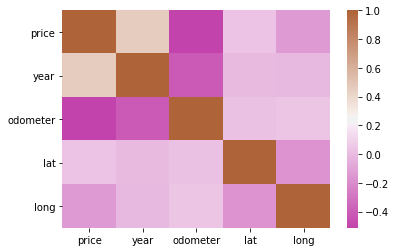

In [14]:
# calculate correlation matrix
corr = vehicles_final.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, 
yticklabels=corr.columns, annot=False, 
cmap=sns.diverging_palette(320, 30, as_cmap=True))

In [15]:
# # create dummy variables
vehicles_final = pd.get_dummies(vehicles_final, drop_first=True)
print(vehicles_final.columns)

Index(['price', 'year', 'odometer', 'lat', 'long', 'region_abilene',
       'region_akron / canton', 'region_albany', 'region_albuquerque',
       'region_altoona-johnstown',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=533)


In [16]:
#Replace NaN values with column means
vehicles_final.isnull().any()
vehicles_final = vehicles_final.fillna(vehicles_final.mean())

In [17]:
# # scale the data
X_head = vehicles_final.iloc[:, vehicles_final.columns != 'price']
X = vehicles_final.loc[:, vehicles_final.columns != 'price']
y = vehicles_final['price']
X = StandardScaler().fit_transform(X)

In [18]:
# Create a base linear model
model = LinearRegression()

# Fit (Train) our base model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Score the base model correlation of features with mse and r2
base = model.predict(X)

mse = mean_squared_error(y, base)
r2 = r2_score(y, base)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 26875444.55368893
R-squared (R2 ): 0.6436044011583975


In [20]:
model.score(X,y)

0.6436044011583975

In [ ]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

#Build prediction model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
# Score the prediction model correlation of features with mse and r2
prediction = model.predict(X_test)

mse = mean_squared_error(y, prediction)
r2 = r2_score(y, prediction)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
model.score(X_test, y_test)